In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Project : Solar Panel Power Prediction

link : https://www.kaggle.com/datasets/vipulgote4/solar-power-generation

In [2]:
df = pd.read_csv('./ml_dataset.csv')

## Part 1 : Data Preparation

In [3]:
df.isnull().sum()

Day of Year                             0
Year                                    0
Month                                   0
Day                                     0
First Hour of Period                    0
Is Daylight                             0
Distance to Solar Noon                  0
Average Temperature (Day)               0
Average Wind Direction (Day)            0
Average Wind Speed (Day)                0
Sky Cover                               0
Visibility                              0
Relative Humidity                       0
Average Wind Speed (Period)             1
Average Barometric Pressure (Period)    0
Power Generated                         0
dtype: int64

At first glance, the data appears to be almost clean. The column names are easy to understand. We just have one missing data item in one row for one column. We can therefore ignore this row by deleting it.

In [4]:
df = df[df['Average Wind Speed (Period)'].notna()]

In [5]:
df.isnull().sum()

Day of Year                             0
Year                                    0
Month                                   0
Day                                     0
First Hour of Period                    0
Is Daylight                             0
Distance to Solar Noon                  0
Average Temperature (Day)               0
Average Wind Direction (Day)            0
Average Wind Speed (Day)                0
Sky Cover                               0
Visibility                              0
Relative Humidity                       0
Average Wind Speed (Period)             0
Average Barometric Pressure (Period)    0
Power Generated                         0
dtype: int64

In [6]:
df.head()

,Day of Year,Year,Month,Day,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
0,245,2008,9,1,1,False,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,245,2008,9,1,4,False,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,245,2008,9,1,7,True,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,245,2008,9,1,10,True,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,245,2008,9,1,13,True,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


We can also see that there are columns with values that could be combined, such as date.

In [7]:
df.insert(0, 'Date', pd.to_datetime(
    dict(year=df.Year, month=df.Month, day=df.Day)
))
df.drop(columns=['Day of Year','Year', 'Month', 'Day'], inplace=True)

In [8]:
df.describe()

,First Hour of Period,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,11.501542,0.503327,58.468996,24.957862,10.099486,1.987667,9.559609,73.505995,10.129154,30.017712,6982.182939
std,6.875714,0.298069,6.842318,6.912203,4.837128,1.412220,1.380290,15.073974,7.261547,0.142006,10313.330078
min,1.000000,0.050401,42.000000,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,5.500000,0.232061,53.000000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,13.000000,0.479241,59.000000,27.000000,10.000000,2.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,17.500000,0.739559,63.000000,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12725.000000
max,22.000000,1.141361,78.000000,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000


As can be seen from the table above, there are no outliers. However, if we look at the temperature column, the values seem high to be in degrees. We therefore need to convert the fahrenheit values to celsius degrees.

In [9]:
def f(x):
    x = (x -32)*(5/9)
    return float(x)

df['Average Temperature (Day)'] = df['Average Temperature (Day)'].apply(f)
df['Average Temperature (Day)']

0       20.555556
1       20.555556
2       20.555556
3       20.555556
4       20.555556
          ...    
2915    17.222222
2916    17.222222
2917    17.222222
2918    17.222222
2919    17.222222
Name: Average Temperature (Day), Length: 2919, dtype: float64

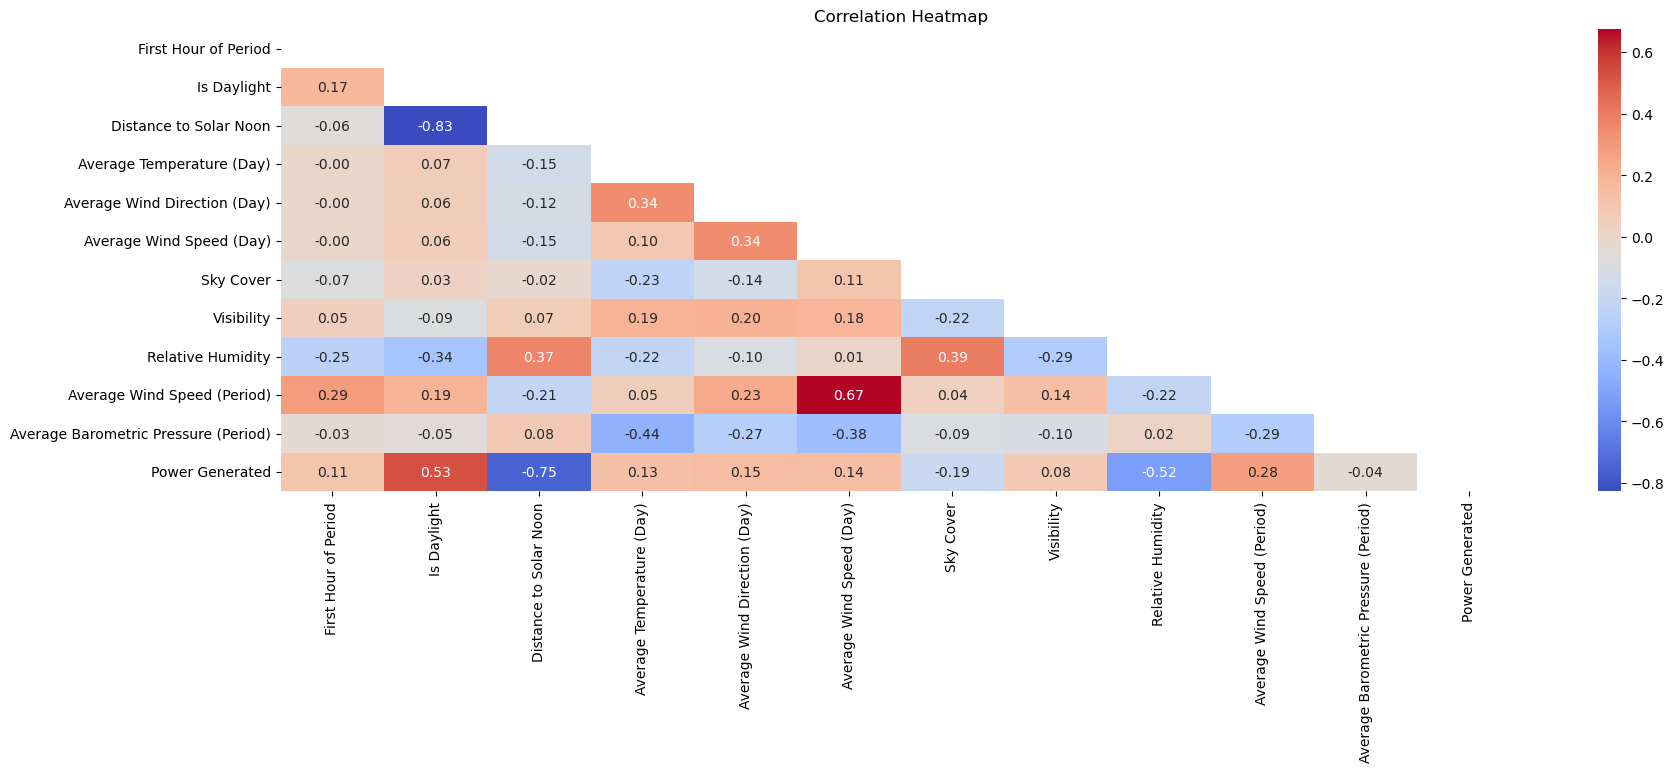

In [10]:
corr = df.corr()

plt.figure(figsize=(20, 6))
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, mask=mask)

ax.set_title('Correlation Heatmap')

plt.show()

Following this Correlation Heatmap, we can see that two columns are very correlated, "Is Daylight" and "Distance to Solar Noon". According to us, "Is Daylight" values are to approximate, so we will drop "Is Daylight" columns.

In [11]:
df.drop(columns=['Is Daylight'], inplace=True)

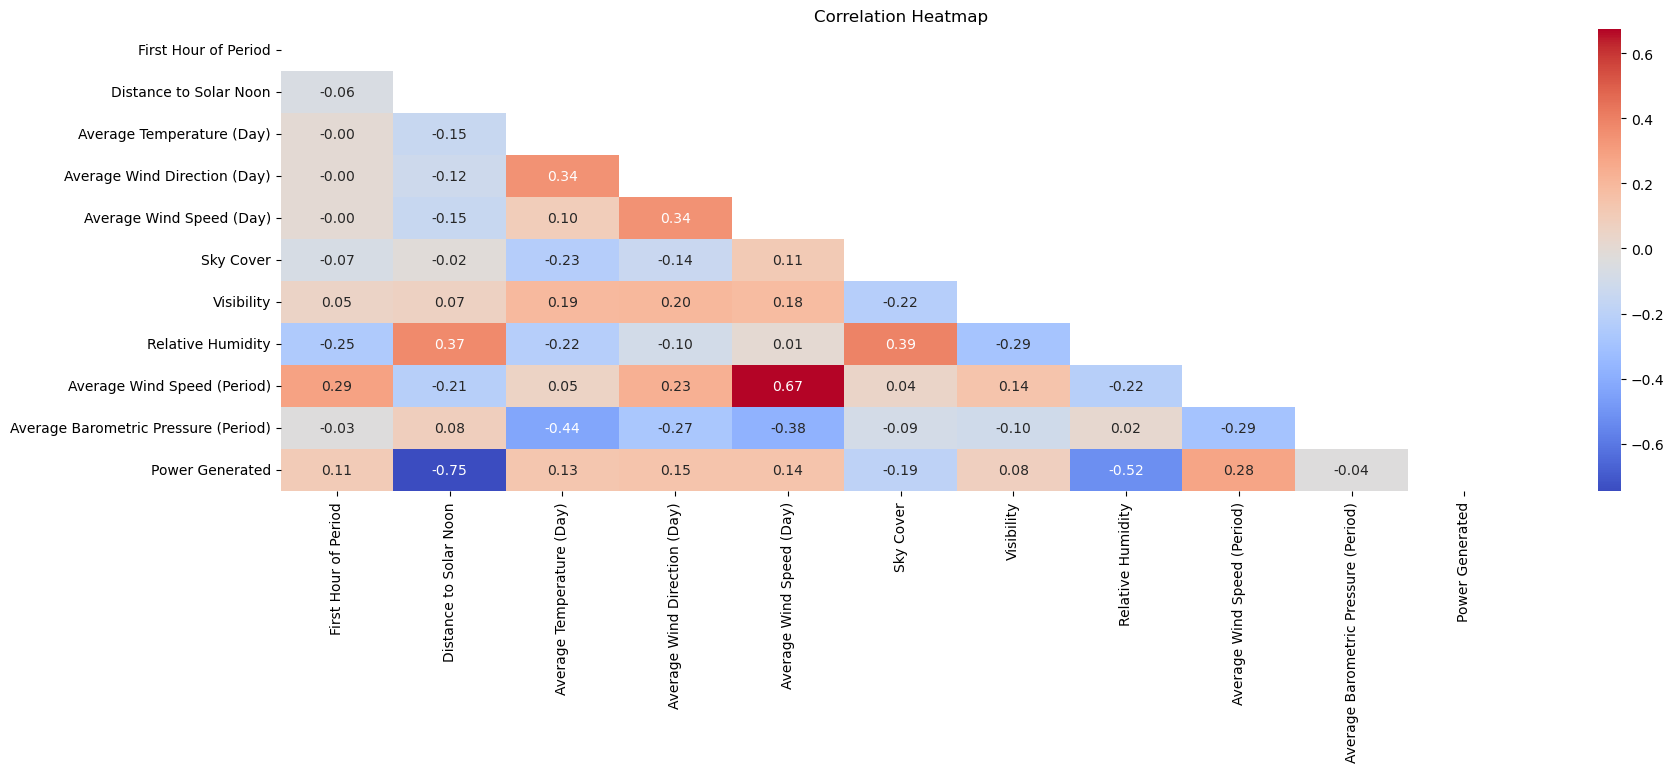

In [12]:
corr = df.corr()

plt.figure(figsize=(20, 6))
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, mask=mask)

ax.set_title('Correlation Heatmap')

plt.show()

In addition, "Distance to Solar Noon" seems, one again, to correlate with "Power Generated". But **"Power Generated"** is our **target** and "Distance to Solar Noon" could be significant for our study so we will keep both.

In [14]:
df.describe()

,First Hour of Period,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,11.501542,0.503327,14.704998,24.957862,10.099486,1.987667,9.559609,73.505995,10.129154,30.017712,6982.182939
std,6.875714,0.298069,3.801288,6.912203,4.837128,1.412220,1.380290,15.073974,7.261547,0.142006,10313.330078
min,1.000000,0.050401,5.555556,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,5.500000,0.232061,11.666667,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,13.000000,0.479241,15.000000,27.000000,10.000000,2.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,17.500000,0.739559,17.222222,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12725.000000
max,22.000000,1.141361,25.555556,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000


For the moment, based on the correlation matrix and the values we have, only the pressure column seems useless. So we intend to keep the others.

In [15]:
df.drop(columns=['Average Barometric Pressure (Period)'], inplace=True)

# Part 2 : Data Visualisation about our Dataset

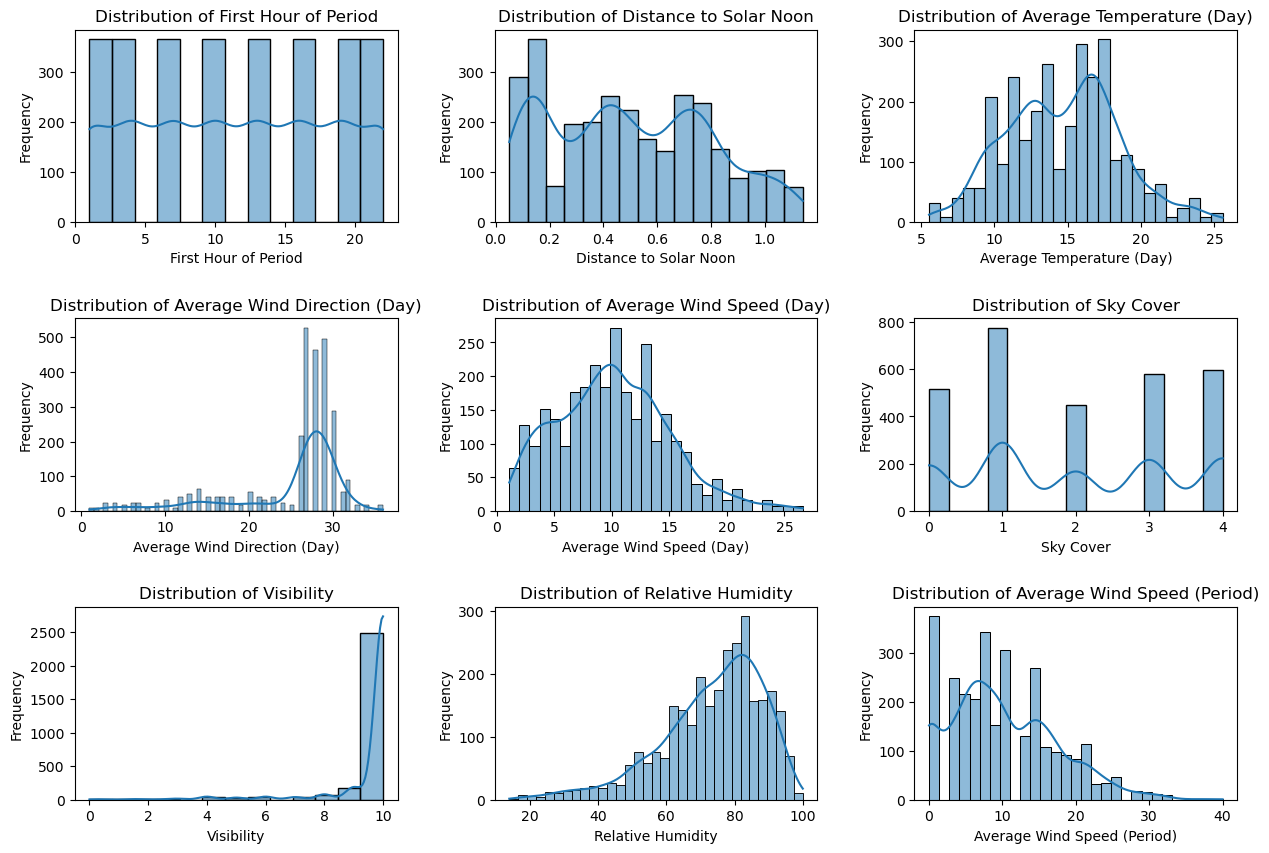

In [16]:
# Plotting the distribution of all main variables
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
cols = df.columns[1:]

for col, ax in zip(cols, axes.flatten()):
    sns.histplot(df[col], ax=ax, kde=True)
    ax.set_title(f'Distribution of {col}')
    ax.set_ylabel('Frequency')

plt.show()

Each subplot shows the distribution of a single variable. We can see that some variables like 'Sky Cover' and 'Visibility' have a discrete distribution, indicating that they have a limited number of distinct values. Others, such as 'Relative Humidity' and 'Average Wind Speed (Period)', show a more continuous distribution.

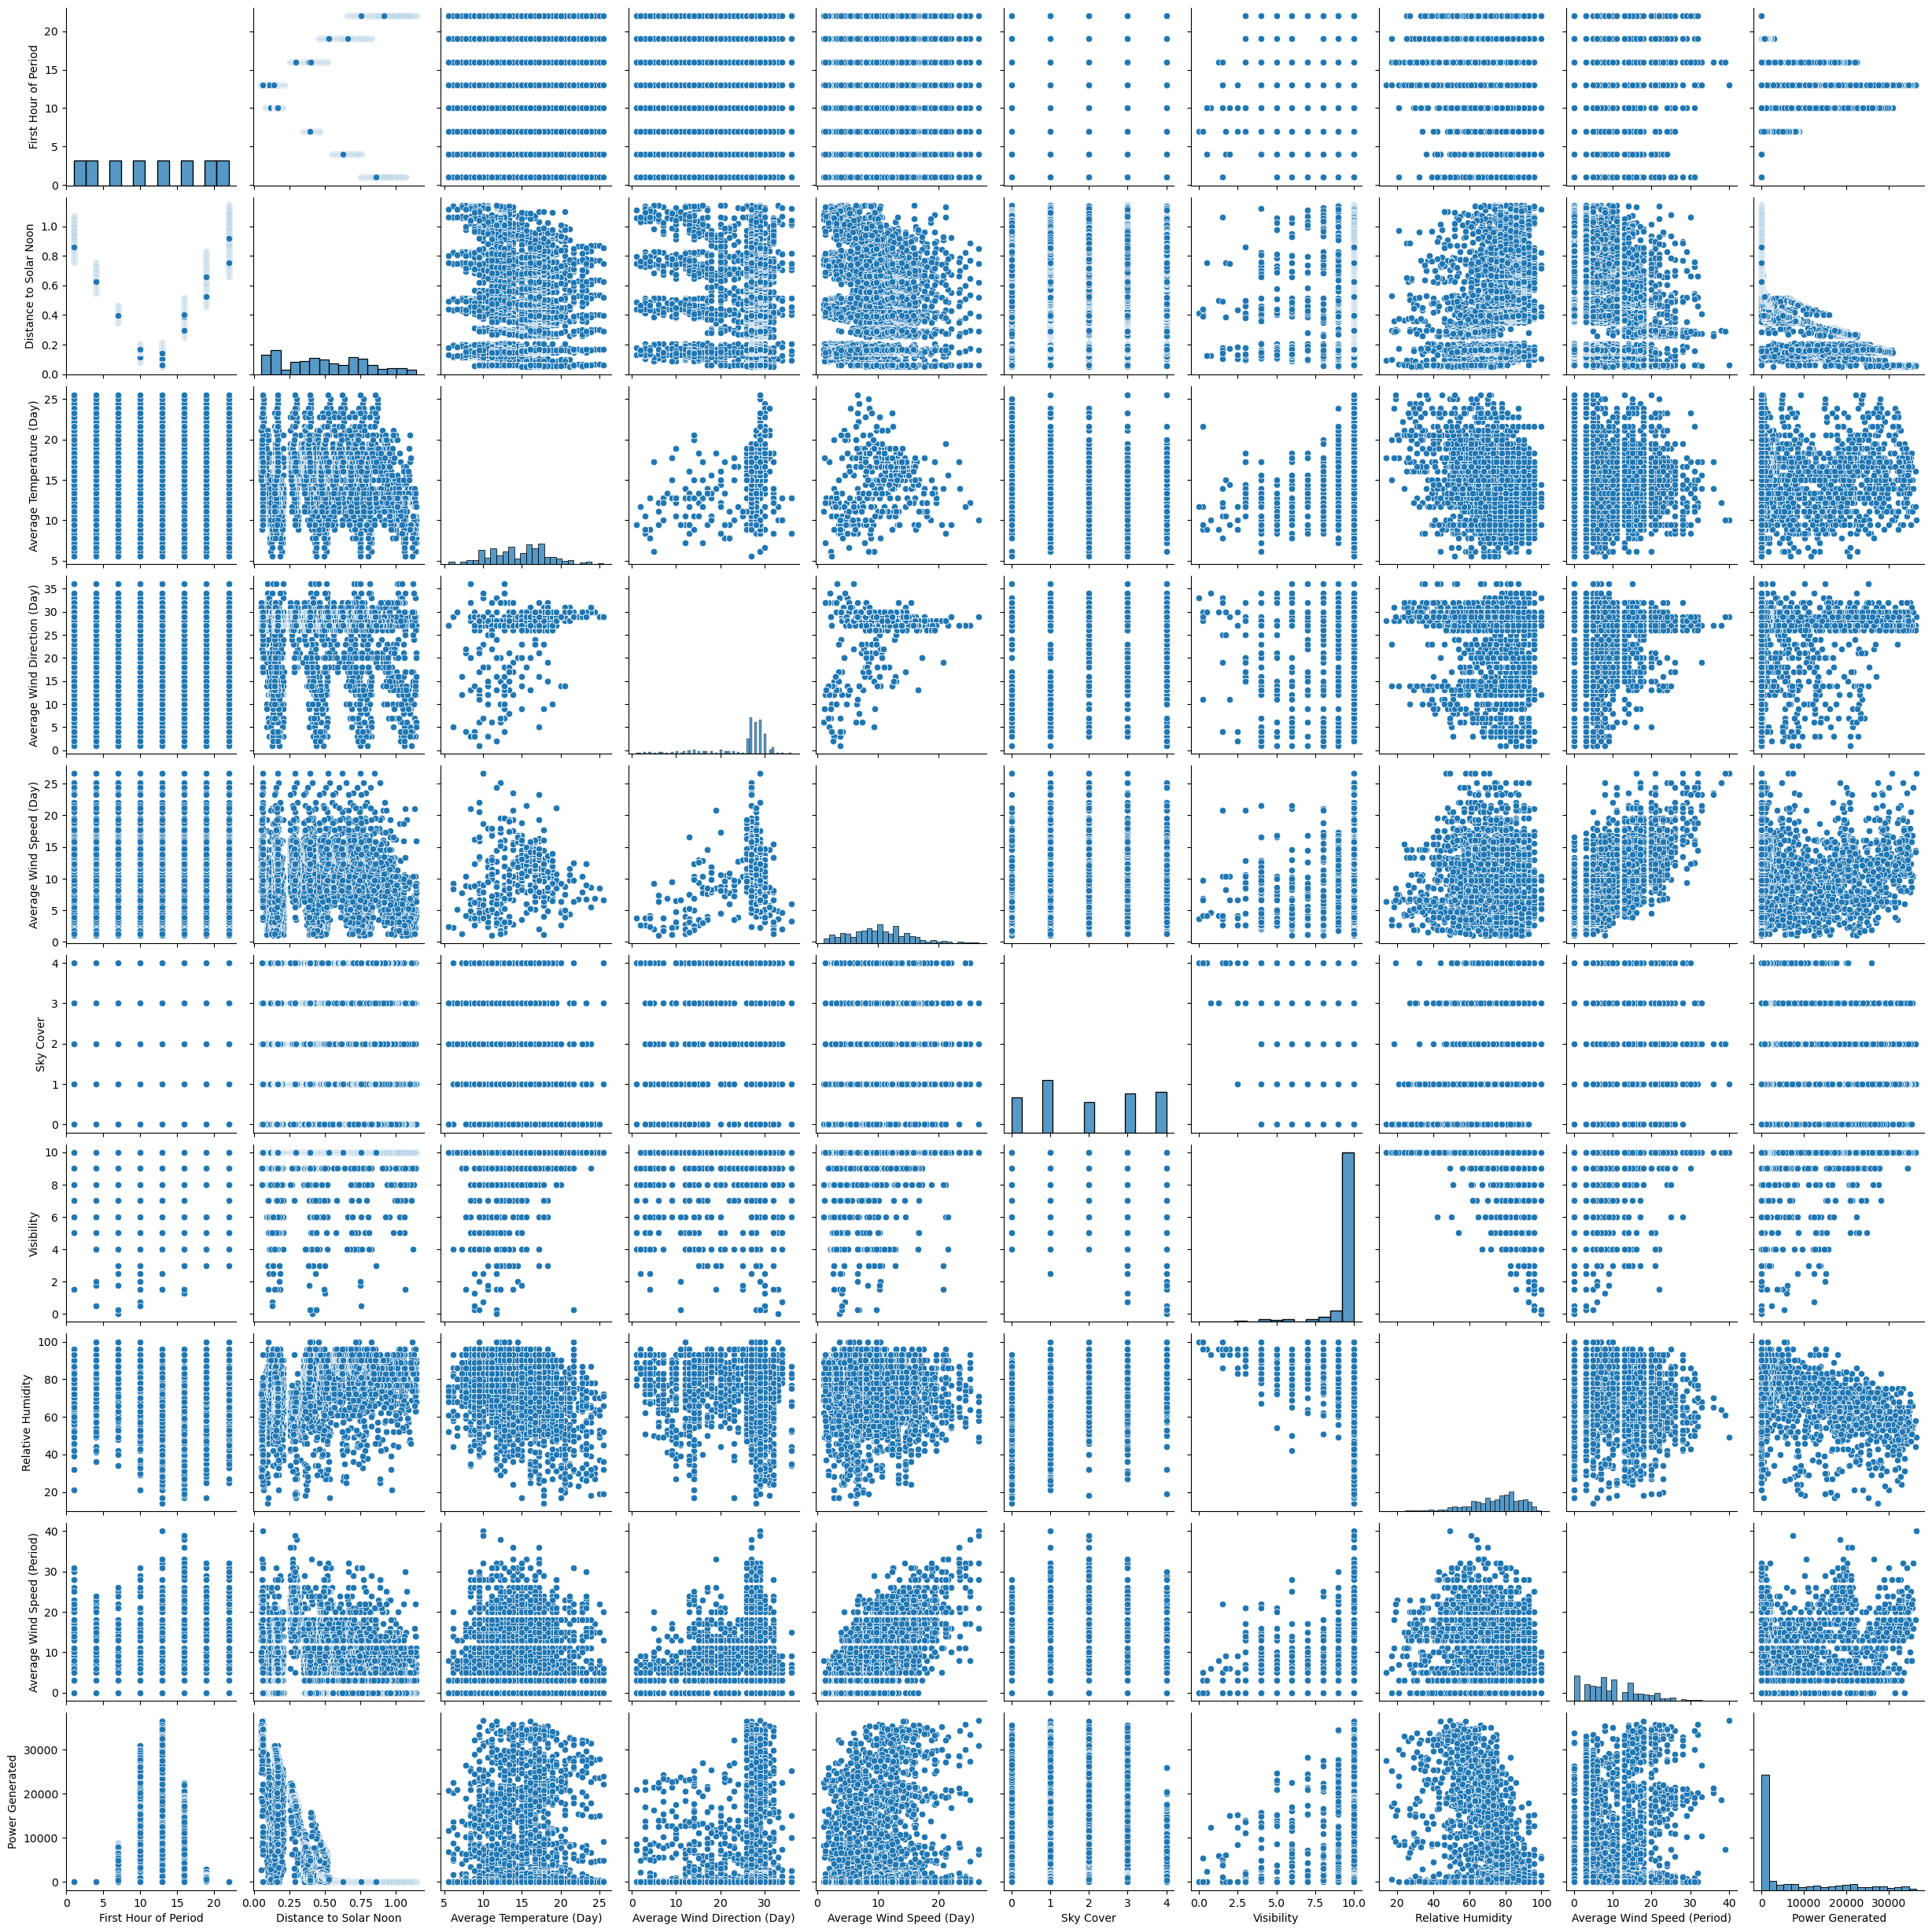

In [17]:
# Pairwise scatter plots
sns.pairplot(df[cols])
plt.show()

These plots are helpful to observe relationships between different variables. For example, there may be a visible correlation between variables like 'Distance to Solar Noon' and 'Power Generated', which would make sense if the power generation is solar-related. Variables such as 'Sky Cover' might also show an inverse relationship with 'Power Generated' due to the impact of cloud cover on solar power generation.

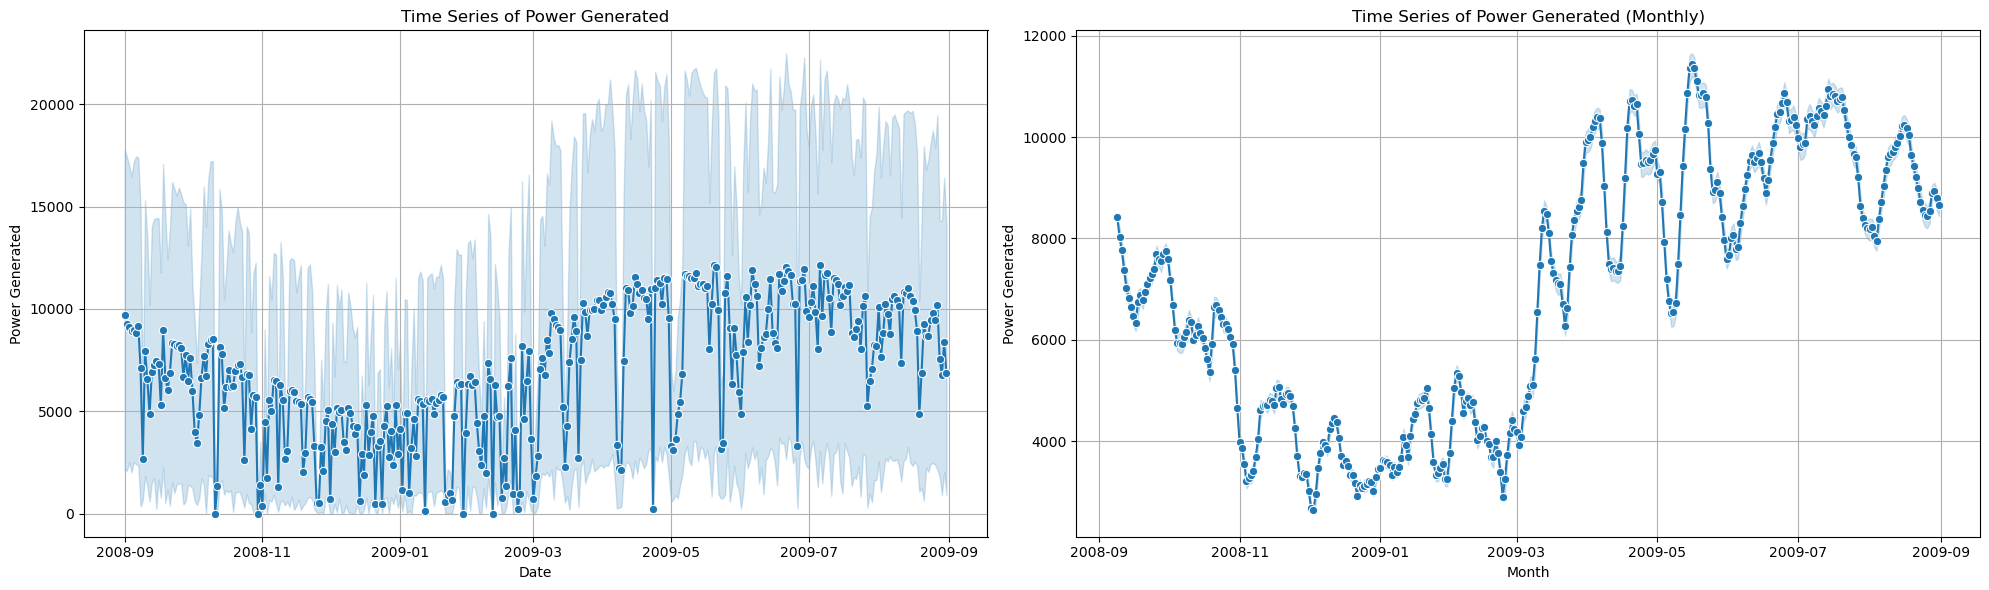

In [31]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)

# Time series plot for 'Power Generated'
sns.lineplot(data=df, x='Date', y='Power Generated', marker='o')
plt.title('Time Series of Power Generated')
plt.xlabel('Date')
plt.ylabel('Power Generated')
plt.grid(True)

df['Month'] = df['Date'].dt.to_period('M')
monthly_data = df.groupby('Month')['Power Generated'].mean().reset_index()
monthly_data['Month'] = monthly_data['Month'].dt.to_timestamp()

plt.subplot(1, 2, 2)
df["glissante"] = df["Power Generated"].rolling(70).mean()
sns.lineplot(data=df, x='Date', y='glissante', marker='o')
plt.title('Time Series of Power Generated (Monthly)')
plt.xlabel('Month')
plt.ylabel('Power Generated')
plt.grid(True)

plt.tight_layout()
plt.show()

The plot indicates that power generation varies throughout the period, with some peaks that could correspond to specific hours of the day or external factors not visible in this plot. It appears that there's a cyclical pattern which could be daily, suggesting that power generation might be influenced by factors like sunlight hours if it's solar power generation we are looking at.

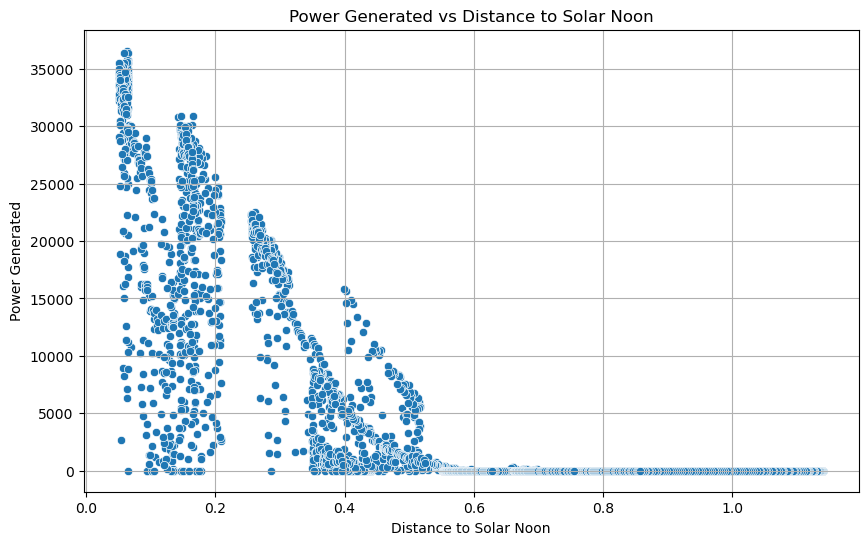

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Distance to Solar Noon', y='Power Generated')
plt.title('Power Generated vs Distance to Solar Noon')
plt.xlabel('Distance to Solar Noon')
plt.ylabel('Power Generated')
plt.grid(True)
plt.show()

According to this graph, we can say that the smaller is the distance to solar noon, the bigger the power generated will be.

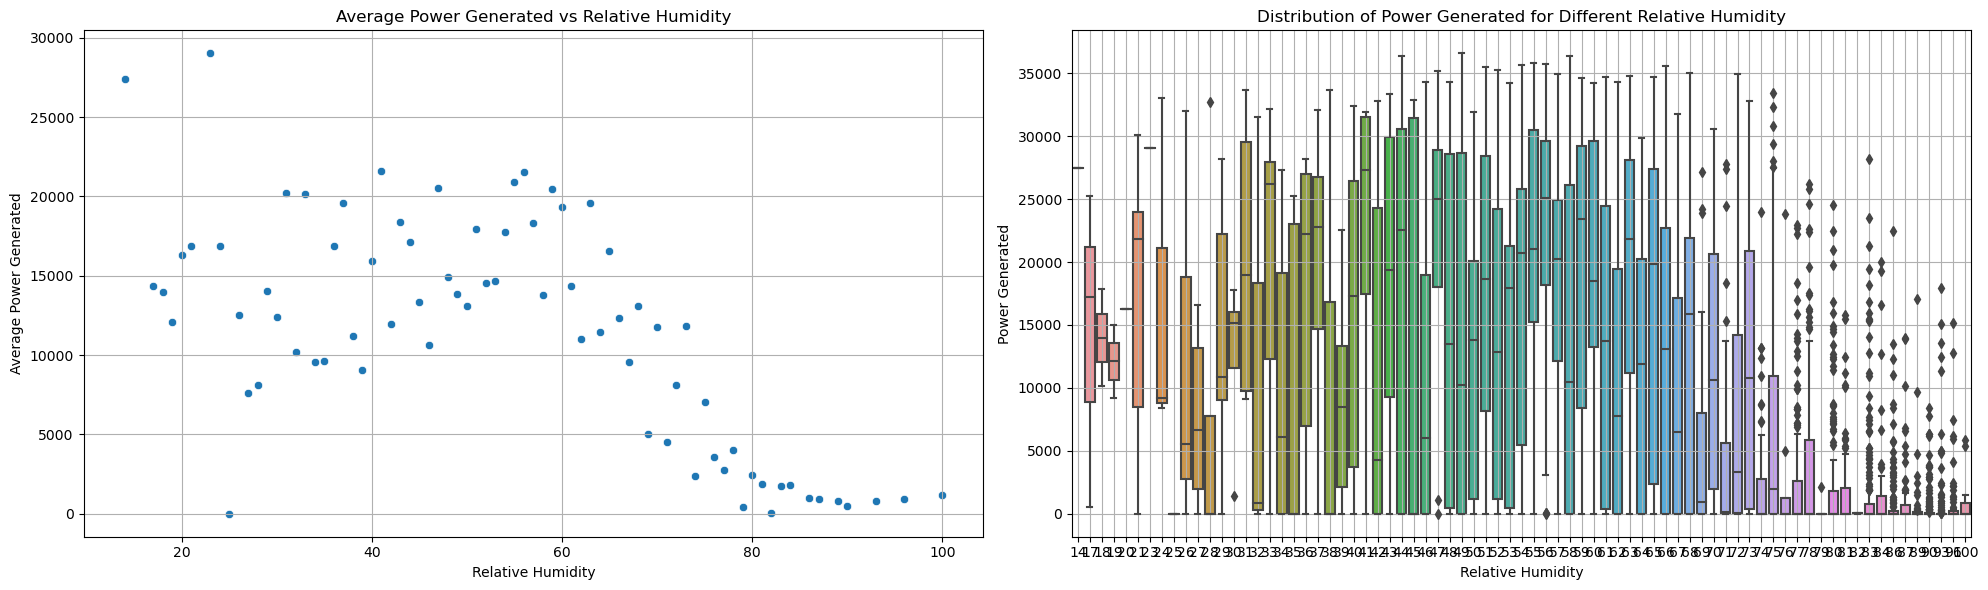

In [35]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
# Calcul des moyennes
mean_df = df.groupby('Relative Humidity', as_index=False)['Power Generated'].mean()
# Création d'un scatter plot avec les moyennes
sns.scatterplot(data=mean_df, x='Relative Humidity', y='Power Generated')
plt.title('Average Power Generated vs Relative Humidity')
plt.xlabel('Relative Humidity')
plt.ylabel('Average Power Generated')
plt.grid(True)
plt.subplot(1, 2, 2)
# Création d'un box plot
sns.boxplot(data=df, x='Relative Humidity', y='Power Generated')
plt.title('Distribution of Power Generated for Different Relative Humidity')
plt.xlabel('Relative Humidity')
plt.ylabel('Power Generated')
plt.grid(True)

plt.tight_layout()
plt.show()

Contrary to the previous graph, there doesn't seem to be much correlation between humidity and power generated. However, if the humidity is very high (>80%), then the power generated is low.

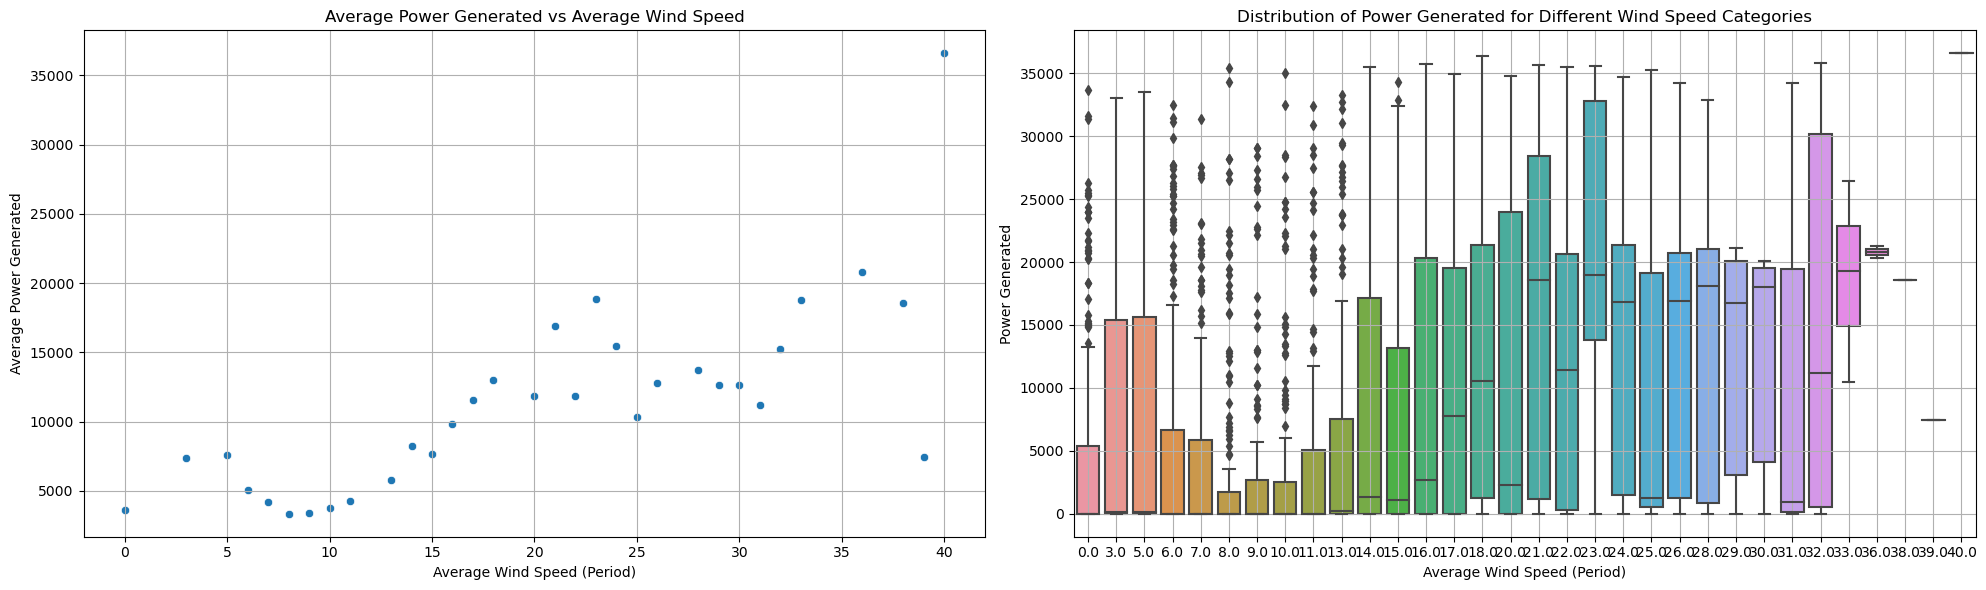

In [34]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
# Calcul des moyennes
mean_df = df.groupby('Average Wind Speed (Period)', as_index=False)['Power Generated'].mean()

# Création d'un scatter plot avec les moyennes
sns.scatterplot(data=mean_df, x='Average Wind Speed (Period)', y='Power Generated')
plt.title('Average Power Generated vs Average Wind Speed')
plt.xlabel('Average Wind Speed (Period)')
plt.ylabel('Average Power Generated')
plt.grid(True)
plt.subplot(1, 2, 2)
# Création d'un box plot
sns.boxplot(data=df, x='Average Wind Speed (Period)', y='Power Generated')
plt.title('Distribution of Power Generated for Different Wind Speed Categories')
plt.xlabel('Average Wind Speed (Period)')
plt.ylabel('Power Generated')
plt.grid(True)

plt.tight_layout()
plt.show()

At first glance, we can draw the same conclusions from this graph as from the previous one. However, we don't have enough data after 20/25 speeds. As a result, we can't conclude on a true correlation between wind speed and power generated.

# Part 3 : Prediction